In [5]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import helper_funcs as my_funcs
import math
%matplotlib inline

In [3]:
dsscdb = pd.read_csv("DBVersions/clarke_DSSCDB.csv", index_col=0)
dsscdb

,VOC,JSC,FF,PCE,Electrolyte,Molecule SMILE,Exposure time (h),Cosensitization time (h),Solar simulator at 1.5G (mW/cm2),Dye loading (nmol/cm2),Semiconductor Type,Semiconductor Film Thickness (um),Semiconductor Scattering Layer Thickness (um),Semiconductor Film Particle Size (nm),Semiconductor Scattering Layer Particle Size (nm),Used Co-sensitizer,Used Co-adsorbent,Co-adsorbent type,Co-adsorbent Conc. (mM),Active area (cm2)
0,687.0,10.79,0.70,5.19,Iodide_Triiodide,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...,15.0,NaN,100.0,NaN,TiO2,NaN,NaN,20.0,NaN,0,0,NaN,NaN,NaN
1,790.0,6.90,0.47,2.60,Spiro-OMeTAD,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,5.0,NaN,100.0,NaN,TiO2,8.0,5.0,NaN,NaN,0,0,NaN,NaN,0.158
2,835.0,7.70,0.49,3.10,Spiro-OMeTAD,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...,5.0,NaN,100.0,NaN,TiO2,8.0,5.0,NaN,NaN,0,0,NaN,NaN,0.158
3,800.0,6.40,0.43,2.20,Spiro-OMeTAD,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...,5.0,NaN,100.0,NaN,TiO2,8.0,5.0,NaN,NaN,0,0,NaN,NaN,0.158
4,651.0,10.30,0.75,5.00,Iodide_Triiodide,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,5.0,NaN,100.0,NaN,TiO2,8.0,5.0,NaN,NaN,0,0,NaN,NaN,0.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,666.0,17.84,0.74,8.79,Iodide_Triiodide,S=C=N[Ru]12(N=C=S)(N3CCC(CC3C3N2CCC(C3)C(=O)[O...,24.0,NaN,100.0,NaN,TiO2,14.0,NaN,NaN,NaN,0,0,NaN,NaN,0.120
4422,651.0,9.93,0.70,4.52,Iodide_Triiodide,C(#N)/C(/C(=O)O)=C\C=1SC(=CC1)C=1C=CC=2N(C3=CC...,24.0,NaN,100.0,296.0,TiO2,14.0,NaN,NaN,NaN,0,0,NaN,NaN,0.120
4423,667.0,12.85,0.71,6.09,Iodide_Triiodide,CSC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,24.0,NaN,100.0,224.0,TiO2,14.0,NaN,NaN,NaN,0,0,NaN,NaN,0.120
4424,659.0,12.46,0.69,5.65,Iodide_Triiodide,COC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,24.0,NaN,100.0,187.0,TiO2,14.0,NaN,NaN,NaN,0,0,NaN,NaN,0.120


In [4]:
trimmed_dsscdb = dsscdb[["PCE", "Molecule SMILE"]]
trimmed_dsscdb

,PCE,Molecule SMILE
0,5.19,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...
1,2.60,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...
2,3.10,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...
3,2.20,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...
4,5.00,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...
...,...,...
4421,8.79,S=C=N[Ru]12(N=C=S)(N3CCC(CC3C3N2CCC(C3)C(=O)[O...
4422,4.52,C(#N)/C(/C(=O)O)=C\C=1SC(=CC1)C=1C=CC=2N(C3=CC...
4423,6.09,CSC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...
4424,5.65,COC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...


In [6]:
from rdkit.Chem import PandasTools

In [28]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

In [7]:
PandasTools.AddMoleculeColumnToFrame(trimmed_dsscdb, 'Molecule SMILE', 'RDKitMol',includeFingerprints=True)

c:\Users\clarkep\AppData\Local\anaconda3\envs\my-rdkit-env\Lib\site-packages\rdkit\Chem\PandasTools.py:381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(


,PCE,Molecule SMILE,RDKitMol
0,5.19,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...,
1,2.60,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,
2,3.10,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...,
3,2.20,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...,
4,5.00,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,
...,...,...,...
4421,8.79,S=C=N[Ru]12(N=C=S)(N3CCC(CC3C3N2CCC(C3)C(=O)[O...,
4422,4.52,C(#N)/C(/C(=O)O)=C\C=1SC(=CC1)C=1C=CC=2N(C3=CC...,
4423,6.09,CSC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,
4424,5.65,COC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,

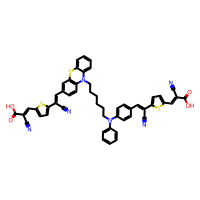
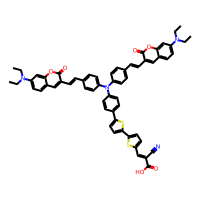
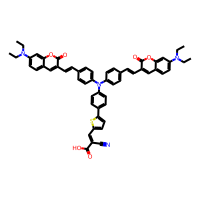
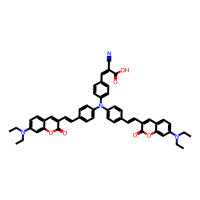
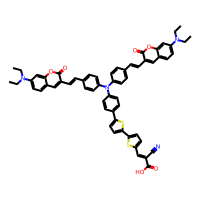
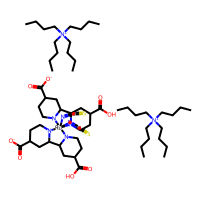
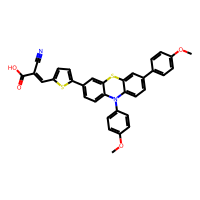
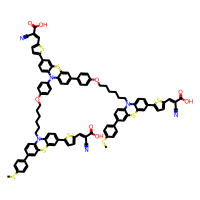
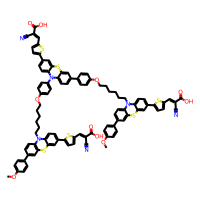
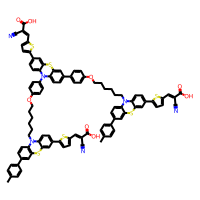

In [8]:
trimmed_dsscdb

In [9]:
PandasTools.WriteSDF(trimmed_dsscdb, 'dsscdb_dyes', molColName="RDKitMol")

In [22]:
alvaDescFP = pd.read_csv("ECFP_1024_m0-3_b2_c.txt", sep='\t', header=0).reset_index().rename(columns={"Extended Connectivity FINGERPRINTS - size:1024 - length:0 to 3 - bits per pattern:2 - count fragments - atom options:Atom type|Aromaticity|Connectivity (total)|Charge|Bond order": "level_1024"}).drop("level_0", axis='columns')
alvaDescFP.to_csv("alvaDesc_fp.csv")

C:\Users\clarkep\AppData\Local\Temp\ipykernel_54376\2052826831.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  alvaDescFP = pd.read_csv("ECFP_1024_m0-3_b2_c.txt", sep='\t', header=0).reset_index().rename(columns={"Extended Connectivity FINGERPRINTS - size:1024 - length:0 to 3 - bits per pattern:2 - count fragments - atom options:Atom type|Aromaticity|Connectivity (total)|Charge|Bond order": "level_1024"}).drop("level_0", axis='columns')
C:\Users\clarkep\AppData\Local\Temp\ipykernel_54376\2052826831.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `n

In [25]:
device_fp = pd.read_csv("DBVersions/device_fp.csv", index_col=0)
alvaDesc_device_fp = pd.concat([alvaDescFP, device_fp], axis='columns')

In [27]:
alvaDesc_device_fp.to_csv("DBVersions/alvaDesc_device_fp.csv")

In [33]:
radius= 3
nBits = 1024

ECFP6 = [AllChem.GetMorganFingerprintAsBitVect(x, radius=radius, nBits=nBits) for x in trimmed_dsscdb["RDKitMol"]]

ecfp6_name = [f'Bit_{i}' for i in range(nBits)]
ecfp6_bits = [list(l) for l in ECFP6]

rdkit_fp = pd.DataFrame(ecfp6_bits, columns=ecfp6_name)
rdkit_fp

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [34]:
rdkit_device_fp = pd.concat([rdkit_fp, device_fp], axis='columns')

In [36]:
rdkit_device_fp.to_csv("DBVersions/rdkit_device_fp.csv")